# Stock Tweets Sentiment Analysis with VADER

This notebook performs sentiment analysis on stock-related tweets using VADER (Valence Aware Dictionary and sEntiment Reasoner).

**VADER** is specifically designed for social media text and works well with:
- Emojis
- Slang
- Abbreviations
- Capitalization (for emphasis)

**Sentiment Scores:**
- `positive`: Positive sentiment score (0-1)
- `negative`: Negative sentiment score (0-1)
- `neutral`: Neutral sentiment score (0-1)
- `compound`: Overall sentiment (-1 to +1)
  - **compound >= 0.05**: Positive
  - **compound <= -0.05**: Negative
  - **-0.05 < compound < 0.05**: Neutral

## Step 1: Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Step 2: Load the Data

In [2]:
# Load the cleaned stock tweets data
df = pd.read_csv('Cleaned_Stock_Tweets.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset Shape: (80793, 4)

Columns: ['Date', 'Tweet', 'Stock Name', 'Company Name']

First few rows:


,Date,Tweet,Stock Name,Company Name
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Basic statistics
print(f"\nTotal Tweets: {len(df):,}")
print(f"Unique Stocks: {df['Stock Name'].nunique()}")
print(f"\nTop 5 Stocks by Tweet Count:")
print(df['Stock Name'].value_counts().head())

Missing values per column:
Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64

Total Tweets: 80,793
Unique Stocks: 25

Top 5 Stocks by Tweet Count:
Stock Name
TSLA    37422
TSM     11034
AAPL     5056
PG       4089
AMZN     4089
Name: count, dtype: int64


## Step 3: Initialize VADER Sentiment Analyzer

In [4]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Test VADER on a sample tweet
sample_tweet = df['Tweet'].iloc[0]
sample_scores = analyzer.polarity_scores(sample_tweet)

print("Sample Tweet:")
print(f"{sample_tweet}\n")
print("Sample Sentiment Scores:")
print(sample_scores)

Sample Tweet:
Mainstream media has done an amazing job at brainwashing people. Today at work, we were asked what companies we believe in &amp; I said @Tesla because they make the safest cars &amp; EVERYONE disagreed with me because they heard“they catch on fire &amp; the batteries cost 20k to replace”

Sample Sentiment Scores:
{'neg': 0.125, 'neu': 0.763, 'pos': 0.113, 'compound': 0.0772}


## Step 4: Apply Sentiment Analysis to All Tweets

In [5]:
# Function to get sentiment scores
def get_sentiment_scores(text):
    """
    Analyzes sentiment of text using VADER.
    Returns a dictionary with sentiment scores.
    """
    if pd.isna(text):
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    return analyzer.polarity_scores(str(text))

# Apply sentiment analysis (this may take a minute)
print("Analyzing sentiment for all tweets...")
print("This may take a minute depending on dataset size...\n")

# Get sentiment scores for each tweet
sentiment_scores = df['Tweet'].apply(get_sentiment_scores)

# Create separate columns for each score
df['sentiment_negative'] = sentiment_scores.apply(lambda x: x['neg'])
df['sentiment_neutral'] = sentiment_scores.apply(lambda x: x['neu'])
df['sentiment_positive'] = sentiment_scores.apply(lambda x: x['pos'])
df['sentiment_compound'] = sentiment_scores.apply(lambda x: x['compound'])

print("✅ Sentiment analysis complete!")
print(f"\nProcessed {len(df):,} tweets")

# Display sample results
df[['Tweet', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'sentiment_compound']].head(10)

Analyzing sentiment for all tweets...
This may take a minute depending on dataset size...

✅ Sentiment analysis complete!

Processed 80,793 tweets


,Tweet,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment_compound
0,Mainstream media has done an amazing job at br...,0.125,0.763,0.113,0.0772
1,Tesla delivery estimates are at around 364k fr...,0.000,1.000,0.000,0.0000
2,3/ Even if I include 63.0M unvested RSUs as of...,0.000,0.954,0.046,0.2960
3,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,0.273,0.590,0.137,-0.7568
4,"@RealDanODowd @Tesla Stop trying to kill kids,...",0.526,0.474,0.000,-0.8750
5,@RealDanODowd @Tesla This is you https://t.co/...,0.000,1.000,0.000,0.0000
6,For years @WholeMarsBlog viciously silenced @T...,0.298,0.662,0.041,-0.9359
7,$NIO just because I'm down money doesn't mean ...,0.155,0.690,0.155,0.2500
8,50 likes for some $SPY $TSLA charts to study!\...,0.000,0.764,0.236,0.4753
9,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,0.272,0.728,0.000,-0.8625


## Step 5: Classify Sentiment as Positive/Negative/Neutral

In [6]:
# Function to classify sentiment based on compound score
def classify_sentiment(compound_score):
    """
    Classifies sentiment based on compound score:
    - Positive: compound >= 0.05
    - Negative: compound <= -0.05
    - Neutral: -0.05 < compound < 0.05
    """
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
df['sentiment_label'] = df['sentiment_compound'].apply(classify_sentiment)

# Display distribution
print("Sentiment Distribution:")
print(df['sentiment_label'].value_counts())
print(f"\nPercentages:")
print(df['sentiment_label'].value_counts(normalize=True) * 100)

Sentiment Distribution:
sentiment_label
Positive    41546
Neutral     22658
Negative    16589
Name: count, dtype: int64

Percentages:
sentiment_label
Positive    51.422772
Neutral     28.044509
Negative    20.532719
Name: proportion, dtype: float64


## Step 6: Visualize Overall Sentiment Distribution

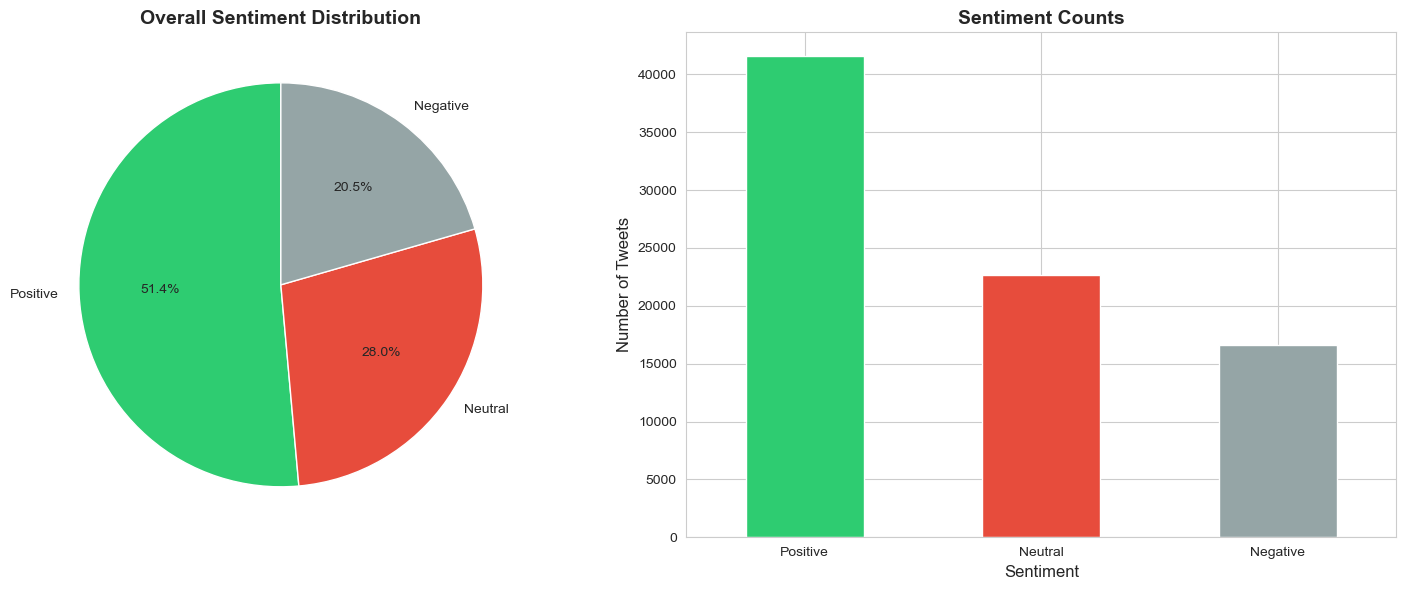

In [7]:
# Create a pie chart of sentiment distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
sentiment_counts = df['sentiment_label'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # Green, Red, Gray
ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('Overall Sentiment Distribution', fontsize=14, fontweight='bold')

# Bar chart
sentiment_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Sentiment Counts', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment', fontsize=12)
ax2.set_ylabel('Number of Tweets', fontsize=12)
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Step 7: Analyze Sentiment by Stock

In [8]:
# Calculate average sentiment by stock
stock_sentiment = df.groupby('Stock Name').agg({
    'sentiment_compound': 'mean',
    'Tweet': 'count'
}).rename(columns={'Tweet': 'tweet_count'})

stock_sentiment = stock_sentiment.sort_values('sentiment_compound', ascending=False)

print("Average Sentiment by Stock (Top 10):")
print(stock_sentiment.head(10))
print("\nBottom 10:")
print(stock_sentiment.tail(10))

Average Sentiment by Stock (Top 10):
            sentiment_compound  tweet_count
Stock Name                                 
BX                    0.331684           50
ENPH                  0.313510          216
ZS                    0.293922          193
AMD                   0.283421         2227
VZ                    0.282993          123
XPEV                  0.277622          225
NIO                   0.244442         3021
CRM                   0.223813          233
TSM                   0.221865        11034
GOOG                  0.217308         1291

Bottom 10:
            sentiment_compound  tweet_count
Stock Name                                 
INTC                  0.180221          315
COST                  0.179517          393
BA                    0.179305          399
TSLA                  0.175953        37422
META                  0.158099         2751
DIS                   0.144843          635
AAPL                  0.144701         5056
F                     0.121

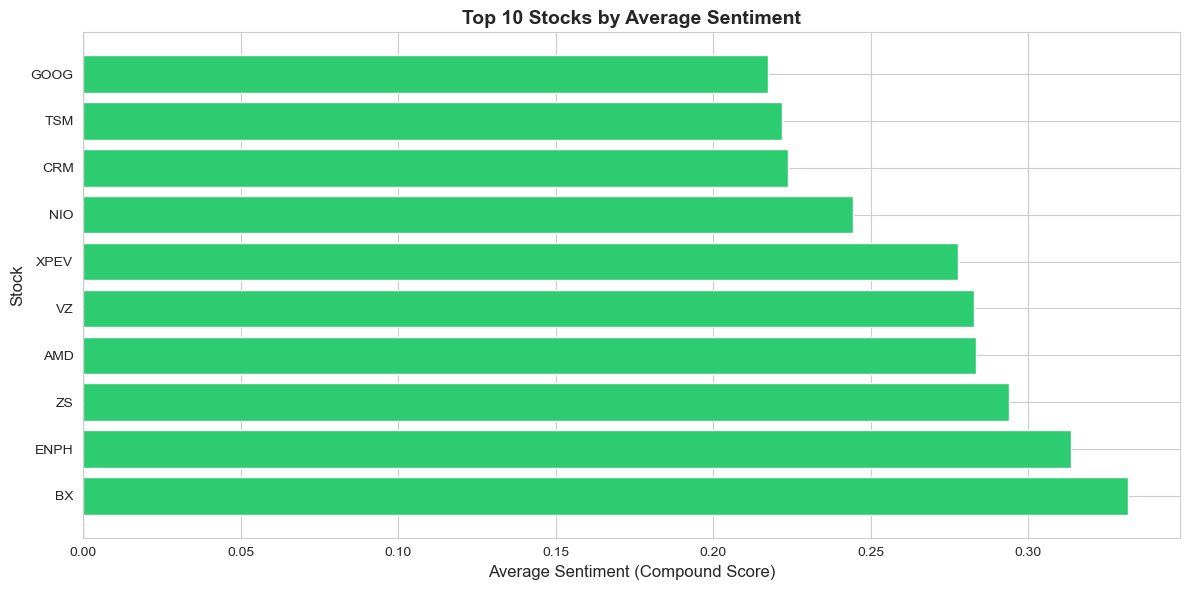

In [9]:
# Visualize top 10 stocks by average sentiment
top_10_stocks = stock_sentiment.head(10)

plt.figure(figsize=(12, 6))
colors_map = ['#2ecc71' if x >= 0 else '#e74c3c' for x in top_10_stocks['sentiment_compound']]
plt.barh(top_10_stocks.index, top_10_stocks['sentiment_compound'], color=colors_map)
plt.xlabel('Average Sentiment (Compound Score)', fontsize=12)
plt.ylabel('Stock', fontsize=12)
plt.title('Top 10 Stocks by Average Sentiment', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## Step 8: Sentiment Distribution by Stock

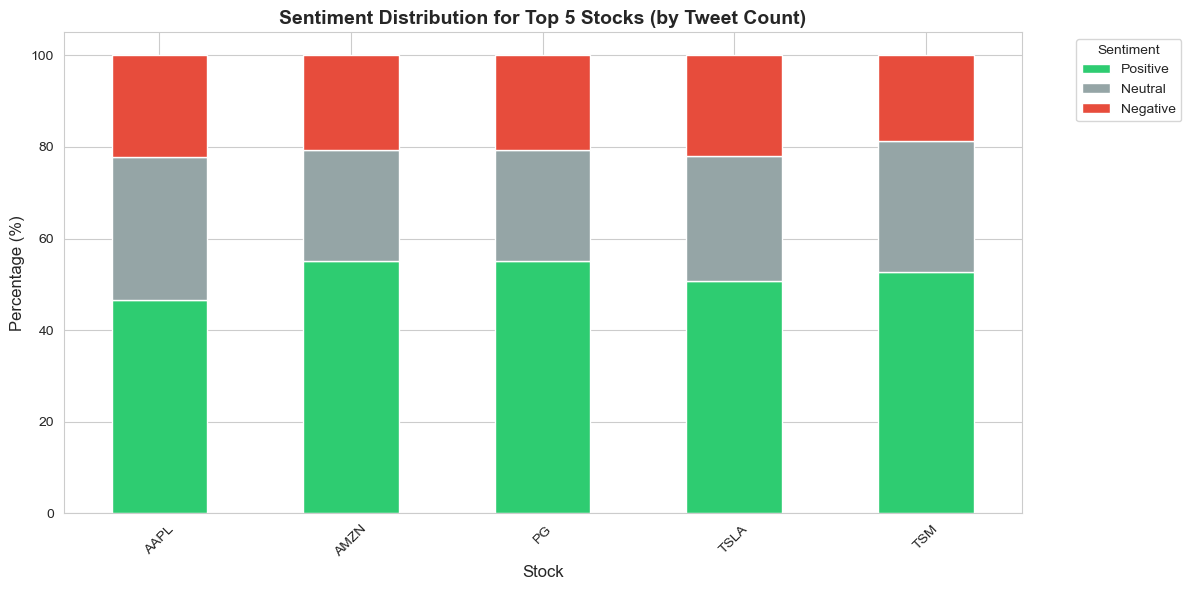

In [10]:
# Get sentiment distribution for top stocks (by tweet count)
top_stocks = df['Stock Name'].value_counts().head(5).index

# Create a stacked bar chart
sentiment_by_stock = pd.crosstab(df[df['Stock Name'].isin(top_stocks)]['Stock Name'], 
                                  df[df['Stock Name'].isin(top_stocks)]['sentiment_label'],
                                  normalize='index') * 100

sentiment_by_stock[['Positive', 'Neutral', 'Negative']].plot(kind='bar', 
                                                               stacked=True,
                                                               color=['#2ecc71', '#95a5a6', '#e74c3c'],
                                                               figsize=(12, 6))
plt.title('Sentiment Distribution for Top 5 Stocks (by Tweet Count)', fontsize=14, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 9: Analyze Sentiment Over Time

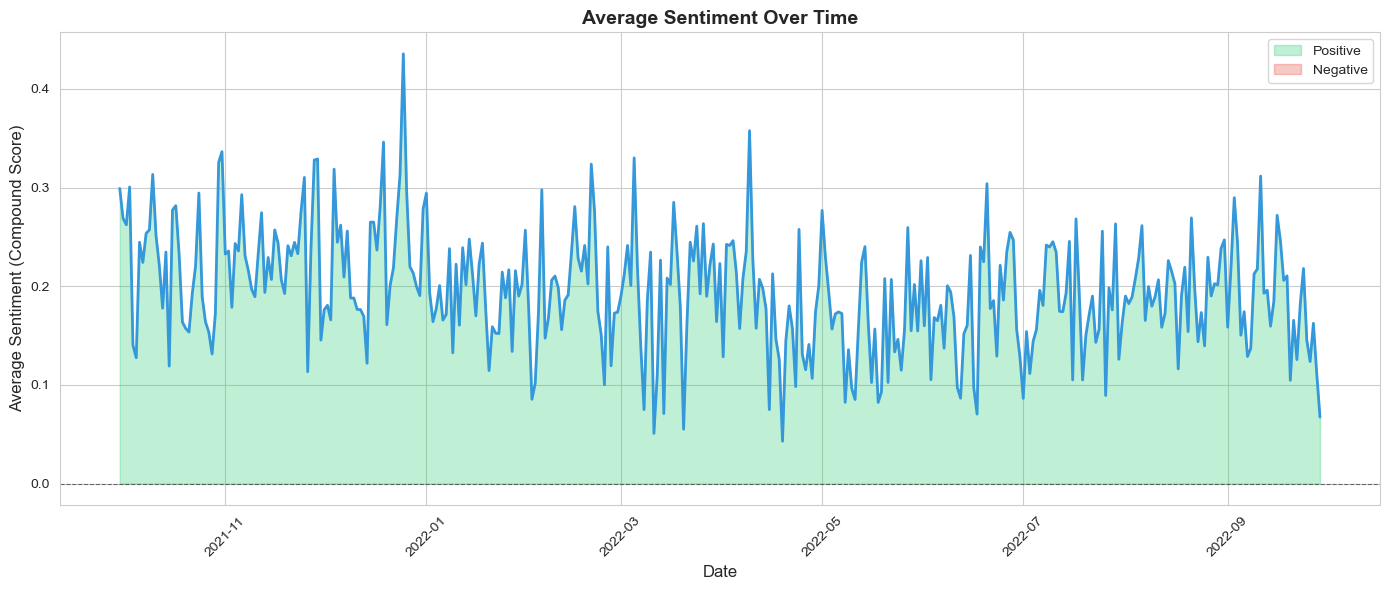

In [11]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily average sentiment
daily_sentiment = df.groupby(df['Date'].dt.date)['sentiment_compound'].mean()

# Plot sentiment over time
plt.figure(figsize=(14, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, linewidth=2, color='#3498db')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
plt.fill_between(daily_sentiment.index, daily_sentiment.values, 0, 
                 where=(daily_sentiment.values >= 0), alpha=0.3, color='#2ecc71', label='Positive')
plt.fill_between(daily_sentiment.index, daily_sentiment.values, 0, 
                 where=(daily_sentiment.values < 0), alpha=0.3, color='#e74c3c', label='Negative')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment (Compound Score)', fontsize=12)
plt.title('Average Sentiment Over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 10: Most Positive and Negative Tweets

In [12]:
# Get most positive tweets
print("🟢 TOP 5 MOST POSITIVE TWEETS:")
print("=" * 80)
most_positive = df.nlargest(5, 'sentiment_compound')[['Tweet', 'Stock Name', 'sentiment_compound']]
for idx, row in most_positive.iterrows():
    print(f"\nStock: {row['Stock Name']} | Score: {row['sentiment_compound']:.3f}")
    print(f"Tweet: {row['Tweet'][:200]}...")
    print("-" * 80)

🟢 TOP 5 MOST POSITIVE TWEETS:

Stock: TSLA | Score: 0.998
Tweet: 2:22 pm @tesla just gave me a call and they said my car is ready to pick up ♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️♥️ $TSLA...
--------------------------------------------------------------------------------

Stock: TSLA | Score: 0.998
Tweet: Q4 margins.

🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣

This will be so entertaining. 

🍿

$TSLA...
--------------------------------------------------------------------------------

Stock: TSLA | Score: 0.997
Tweet: @hikingskiing I only own 6,000 $TSLA shares but not done adding with every dip. Adding more shares with every house I sale. Great motivation to work harder every single day. $TSLA motivates me like no...
--------------------------------------------------------------------------------

Stock: TSLA | Score: 0.993
Tweet: Hey @Elonmusk and @Tesla - Thank you for swapping the WholeMars Magic car with my Model X 'Christine' (yes after the Steven King movie)!   I had a pretty decent drive on #FSDBeta

In [13]:
# Get most negative tweets
print("🔴 TOP 5 MOST NEGATIVE TWEETS:")
print("=" * 80)
most_negative = df.nsmallest(5, 'sentiment_compound')[['Tweet', 'Stock Name', 'sentiment_compound']]
for idx, row in most_negative.iterrows():
    print(f"\nStock: {row['Stock Name']} | Score: {row['sentiment_compound']:.3f}")
    print(f"Tweet: {row['Tweet'][:200]}...")
    print("-" * 80)

🔴 TOP 5 MOST NEGATIVE TWEETS:

Stock: TSLA | Score: -0.999
Tweet: Let’s go $TSLA post-split today starting at $303.00 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 https://t.co/Kbg4AiDgB5...
--------------------------------------------------------------------------------

Stock: TSLA | Score: -0.994
Tweet: Next QTR Earnings:
$AAPL : fucked (China)
$TSLA : fucked (China)
All Ad companies: fucked (recession)
Retail stocks: Fucked (consumer is dead)
Banks: fucked (inversion)
Crypto stocks: fucked (wonder w...
--------------------------------------------------------------------------------

Stock: AAPL | Score: -0.994
Tweet: Next QTR Earnings:
$AAPL : fucked (China)
$TSLA : fucked (China)
All Ad companies: fucked (recession)
Retail stocks: Fucked (consumer is dead)
Banks: fucked (inversion)
Crypto stocks: fucked (wonder w...
--------------------------------------------------------------------------------

Stock: TSM | Score: -0.992
Tweet: I refuse 😭 to believe 😭 fnatic 😭 is goin

## Step 11: Summary Statistics

In [14]:
# Calculate summary statistics
print("📊 SENTIMENT ANALYSIS SUMMARY")
print("=" * 60)
print(f"\nTotal Tweets Analyzed: {len(df):,}")
print(f"Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"Number of Unique Stocks: {df['Stock Name'].nunique()}")

print(f"\n📈 Overall Sentiment Statistics:")
print(f"  Average Compound Score: {df['sentiment_compound'].mean():.3f}")
print(f"  Median Compound Score: {df['sentiment_compound'].median():.3f}")
print(f"  Std Deviation: {df['sentiment_compound'].std():.3f}")

print(f"\n🎯 Sentiment Breakdown:")
sentiment_pct = df['sentiment_label'].value_counts(normalize=True) * 100
for label, pct in sentiment_pct.items():
    print(f"  {label}: {pct:.1f}%")

print(f"\n⭐ Most Discussed Stocks:")
top_3_stocks = df['Stock Name'].value_counts().head(3)
for stock, count in top_3_stocks.items():
    avg_sentiment = df[df['Stock Name'] == stock]['sentiment_compound'].mean()
    print(f"  {stock}: {count:,} tweets | Avg Sentiment: {avg_sentiment:.3f}")

📊 SENTIMENT ANALYSIS SUMMARY

Total Tweets Analyzed: 80,793
Date Range: 2021-09-30 to 2022-09-29
Number of Unique Stocks: 25

📈 Overall Sentiment Statistics:
  Average Compound Score: 0.190
  Median Compound Score: 0.103
  Std Deviation: 0.448

🎯 Sentiment Breakdown:
  Positive: 51.4%
  Neutral: 28.0%
  Negative: 20.5%

⭐ Most Discussed Stocks:
  TSLA: 37,422 tweets | Avg Sentiment: 0.176
  TSM: 11,034 tweets | Avg Sentiment: 0.222
  AAPL: 5,056 tweets | Avg Sentiment: 0.145


## Step 12: Save Results to CSV

In [15]:
# Save the dataframe with sentiment scores to a new CSV file
output_filename = 'Stock_Tweets_With_Sentiment.csv'
df.to_csv(output_filename, index=False)

print(f"✅ Results saved to: {output_filename}")
print(f"\nNew columns added:")
print("  - sentiment_negative")
print("  - sentiment_neutral")
print("  - sentiment_positive")
print("  - sentiment_compound")
print("  - sentiment_label (Positive/Negative/Neutral)")

✅ Results saved to: Stock_Tweets_With_Sentiment.csv

New columns added:
  - sentiment_negative
  - sentiment_neutral
  - sentiment_positive
  - sentiment_compound
  - sentiment_label (Positive/Negative/Neutral)


## Step 13: Export Summary Report

In [16]:
# Create a summary report by stock
summary_report = df.groupby('Stock Name').agg({
    'Tweet': 'count',
    'sentiment_compound': ['mean', 'std', 'min', 'max'],
    'sentiment_positive': 'mean',
    'sentiment_negative': 'mean',
    'sentiment_neutral': 'mean'
}).round(3)

# Flatten column names
summary_report.columns = ['_'.join(col).strip() for col in summary_report.columns.values]
summary_report = summary_report.rename(columns={'Tweet_count': 'tweet_count'})

# Add sentiment label counts
sentiment_counts = df.groupby(['Stock Name', 'sentiment_label']).size().unstack(fill_value=0)
summary_report = summary_report.join(sentiment_counts)

# Sort by tweet count
summary_report = summary_report.sort_values('tweet_count', ascending=False)

# Save summary report
summary_filename = 'Sentiment_Summary_By_Stock.csv'
summary_report.to_csv(summary_filename)

print(f"✅ Summary report saved to: {summary_filename}")
print(f"\nPreview of summary report:")
summary_report.head(10)

✅ Summary report saved to: Sentiment_Summary_By_Stock.csv

Preview of summary report:


,tweet_count,sentiment_compound_mean,sentiment_compound_std,sentiment_compound_min,sentiment_compound_max,sentiment_positive_mean,sentiment_negative_mean,sentiment_neutral_mean,Negative,Neutral,Positive
Stock Name,,,,,,,,,,,
TSLA,37422,0.176,0.451,-0.999,0.998,0.103,0.048,0.848,8198,10279,18945
TSM,11034,0.222,0.455,-0.992,0.992,0.149,0.057,0.794,2062,3158,5814
AAPL,5056,0.145,0.433,-0.994,0.990,0.078,0.042,0.880,1120,1586,2350
AMZN,4089,0.204,0.447,-0.951,0.982,0.097,0.041,0.862,848,985,2256
PG,4089,0.204,0.447,-0.951,0.982,0.097,0.041,0.862,848,985,2256
MSFT,4089,0.204,0.447,-0.951,0.982,0.097,0.041,0.862,848,985,2256
NIO,3021,0.244,0.398,-0.936,0.989,0.100,0.024,0.876,324,1158,1539
META,2751,0.158,0.447,-0.979,0.986,0.084,0.048,0.868,630,797,1324
AMD,2227,0.283,0.458,-0.987,0.981,0.105,0.033,0.863,351,573,1303


## 🎉 Analysis Complete!

### What You've Done:
1. ✅ Loaded and explored your stock tweets dataset
2. ✅ Applied VADER sentiment analysis to all tweets
3. ✅ Created visualizations of sentiment distributions
4. ✅ Analyzed sentiment by stock and over time
5. ✅ Identified most positive and negative tweets
6. ✅ Saved results to CSV files

### Output Files:
- `Stock_Tweets_With_Sentiment.csv` - Full dataset with sentiment scores
- `Sentiment_Summary_By_Stock.csv` - Summary statistics by stock

### Next Steps (Optional):
- Compare sentiment with actual stock price movements
- Analyze correlation between tweet volume and sentiment
- Build a sentiment trend predictor
- Filter by specific date ranges or stocks for deeper analysis